## Loading Libraries

In [1]:
library('ggplot2')
library('gridExtra')
library('reshape2')
library(RColorBrewer)
library(grid)

## Set working directory and output directories

In [2]:
projectdir="../"
setwd(projectdir)
paperfigdir="figures"
supfigdir="figures/supfigures"

## Plotting Functions

In [3]:
add_corner_label <- function(p, letter){
    newp <- arrangeGrob(p, top=textGrob(toupper(letter), x=unit(0, "npc"), y=unit(1, "npc"), just=c("left", "top")))
    return(newp)
}

# Cancer datasets 

## FigureS3 : ICGC

In [4]:
svcnts=read.table("data/cancer_SVcnts/ICGC_SV_counts_per_cohort.txt", header=TRUE)
svcnts=svcnts[svcnts$cohort != "BOCA-UK",]  # Leave these out because they are just cell lines
svcnts=svcnts[svcnts$cohort != "BRCA-UK",]

df=data.frame(svcnts)

p1 <- ggplot(df, aes(x=cohort, y=WGS)) + geom_bar(stat = "identity", position="dodge", fill="steelblue") + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust =0.5)) + 
    labs(y="Number of\nSamples", x="") +
    theme(plot.margin=unit(c(0,3,0,0), "cm"), 
          plot.title=element_text(hjust=0), panel.border = element_blank())

df.m <- melt(data.frame(cbind(cohort=svcnts$cohort, svcnts[,6:12]/svcnts$WGS)))
p2 <- ggplot(df.m, aes(x=cohort, fill=variable, y=value)) + 
    geom_bar(stat="identity", position="stack") + 
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + # element_text(angle=90, hjust=1, vjust =0.5)) + 
    ylab("Average SVs\nPer Sample") + labs(fill="SV type", x="") + ggtitle("ICGC") + 
    theme(plot.margin=unit(c(0,0,0,0), "cm"), legend.key.size=unit(10, "pt"), 
          plot.title=element_text(hjust=0), panel.border = element_blank())

Using cohort as id variables


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (2-2,1-1) arrange gtable[arrange]

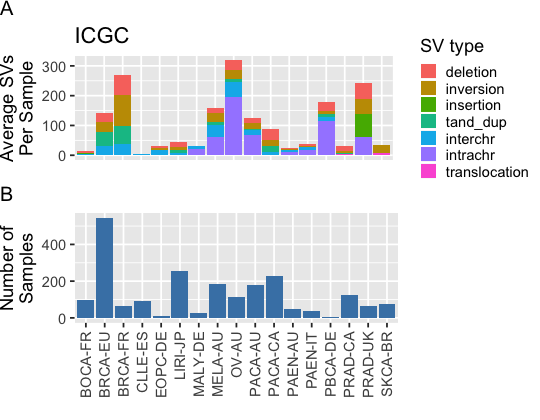

In [5]:
options(repr.plot.width=4.5, repr.plot.height=3.5)

p2a <- add_corner_label(p2, "a")
p1b <- add_corner_label(p1, "b")
g=grid.arrange(p2a, p1b, ncol=1, heights=c(2,2.5))
g

In [6]:
ggsave(file="SupFigure6_icgc.pdf", plot=g, path=supfigdir, width=4.5, height=3.5, units="in", dpi=600)
ggsave(file="SupFigure6_icgc.png", plot=g, path=supfigdir, width=4.5, height=3.5, units="in", dpi=600)

## FigureS4: TCGA

In [7]:
svcnts=read.table("data/cancer_SVcnts/TCGA_counts_per_cohort.txt", header=TRUE)
svcnts=svcnts[svcnts$type!="PANC",]
df=data.frame(svcnts)
p1 <- ggplot(df, aes(x=type, y=sample_cnt)) + 
    geom_bar(stat = "identity", position="dodge", fill="steelblue") + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust =0.5, size=7)) + 
    labs(y="Number of\nSamples", x="") + 
    theme(plot.margin=unit(c(0,3,0,0), "cm"))

mycolors=c(brewer.pal(n=3, name="Blues"), brewer.pal(n=3, name="Oranges"))
df.m <- melt(data.frame(cbind(type=svcnts$type, svcnts[,3:8])))
p2 <- ggplot(df.m, aes(x=type, fill=variable, y=value)) + 
    geom_bar(stat="identity", position="stack") + ggtitle("TCGA") + 
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + #element_text(angle=90, hjust=1, vjust =0.5)) + 
    labs(y="Average CNVs\nPer Sample", x="", fill="CNV type") + 
    scale_fill_manual(values=mycolors, breaks=names(df)[3:8], 
        labels=c("del < 1kb", "del 1-10kb", "del >10kb", "amp < 1kb", "amp 1-10kb", "amp >10kb")) + 
    theme(plot.margin=unit(c(0,0,0,.2), "cm"), legend.key.size=unit(10, "pt"), plot.title=element_text(hjust=0))

Using type as id variables


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (2-2,1-1) arrange gtable[arrange]

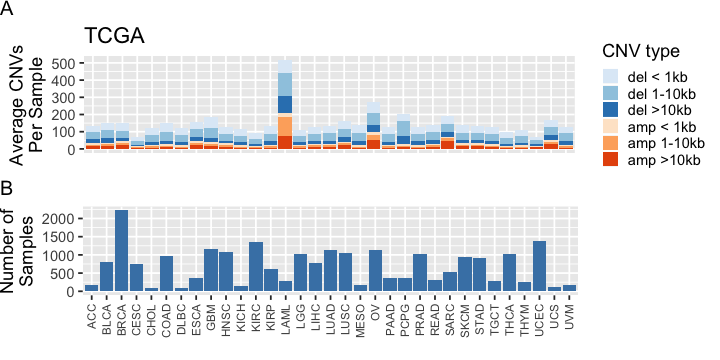

In [8]:
options(repr.plot.width=6, repr.plot.height=3)
p2a <- add_corner_label(p2, "a")
p1b <- add_corner_label(p1, "b")
g=grid.arrange(p2a, p1b, ncol=1)
g
ggsave(file="SupFigure7_tcga.pdf", plot=g, path=supfigdir, width=6, height=3, units="in", dpi=600)
ggsave(file="SupFigure7_tcga.png", plot=g, path=supfigdir, width=6, height=3, units="in", dpi=600)